In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AIRPOL_data.csv", delimiter=';')

print(f"Dataframe Shape: {df.shape}")
print(f"{df.shape[0]} rows")
print(f"{df.shape[1]} columns")

df.info()

Dataframe Shape: (49140, 16)
49140 rows
16 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49140 entries, 0 to 49139
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       49140 non-null  object 
 1   NUTS_Code                     49140 non-null  object 
 2   Air_Pollutant                 49140 non-null  object 
 3   Outcome                       49140 non-null  object 
 4   Affected_Population           49140 non-null  object 
 5   Populated_Area[km2]           49140 non-null  object 
 6   Air_Pollution_Average[ug/m3]  49140 non-null  object 
 7   Value                         49140 non-null  object 
 8   Unnamed: 8                    0 non-null      float64
 9   Unnamed: 9                    0 non-null      float64
 10  Unnamed: 10                   0 non-null      float64
 11  Unnamed: 11                   0 non-null      float64
 12  Unnamed: 

In [3]:
toDrop = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
          'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
          'Unnamed: 14', 'Unnamed: 15']

df.drop(columns=toDrop, axis=1, inplace = True)

df = df[
    (df['Country'] != "All countries") &
    (df['NUTS_Code'].str.len() >= 5)
]

to_cast = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Value']
for col in to_cast:
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

df.describe()

,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
count,3.682100e+04,3.682100e+04,36821.000000,36821.000000
mean,5.370635e+05,3.419571e+03,15.193990,190.377719
std,9.996146e+06,6.186359e+04,22.554792,5988.393040
min,2.674000e+03,1.120000e+01,0.100000,0.000000
25%,9.212800e+04,4.731000e+02,7.400000,2.000000
50%,1.745990e+05,9.216000e+02,8.900000,14.000000
75%,3.271110e+05,2.121000e+03,11.300000,65.000000
max,4.680626e+08,2.687568e+06,125.700000,740933.000000


## Predictors

#### Univariate Analysis for numerical variables

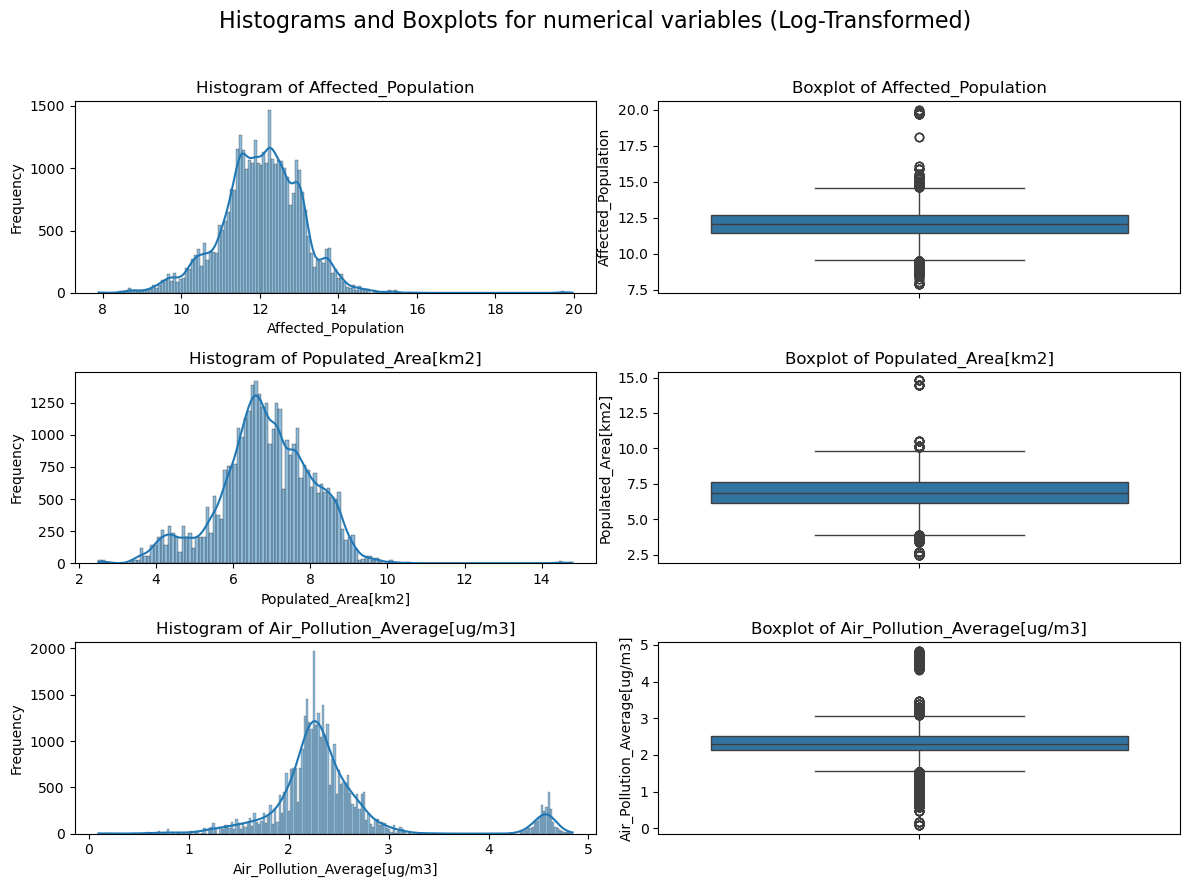

In [4]:
numeric_pred = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]']

df_log = df.copy()

for col in numeric_pred:
    df_log[col] = np.log1p(df_log[col])

fig, axe = plt.subplots(nrows = len(numeric_pred), ncols = 2, figsize = (12, 3*len(numeric_pred)))
fig.suptitle('Histograms and Boxplots for numerical variables (Log-Transformed)', fontsize=16)
for i, column in enumerate(numeric_pred):
    sns.histplot(df_log[column], ax=axe[i, 0], kde=True)
    axe[i, 0].set_title(f"Histogram of {column}")
    axe[i, 0].set_xlabel(column)
    axe[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=df_log[column], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {column}")
    axe[i, 1].set_ylabel(column)


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### Análise:
Verifica-se que os dados correspondentes à população afetada, área populada e poluição média do ar, apresentam uma distribuição próxima de uma distribuição normal. Todas as variáveis apresentam, à primeira vista, outliers consideráveis. No entanto, há a necessidade de analisar mais detalhadamente estes dados por país e por poluente pois estas variações podem estar relacionadas com esses fatores. 


#### Univariate Analysis for discrete variables and its relation with numerical variables 

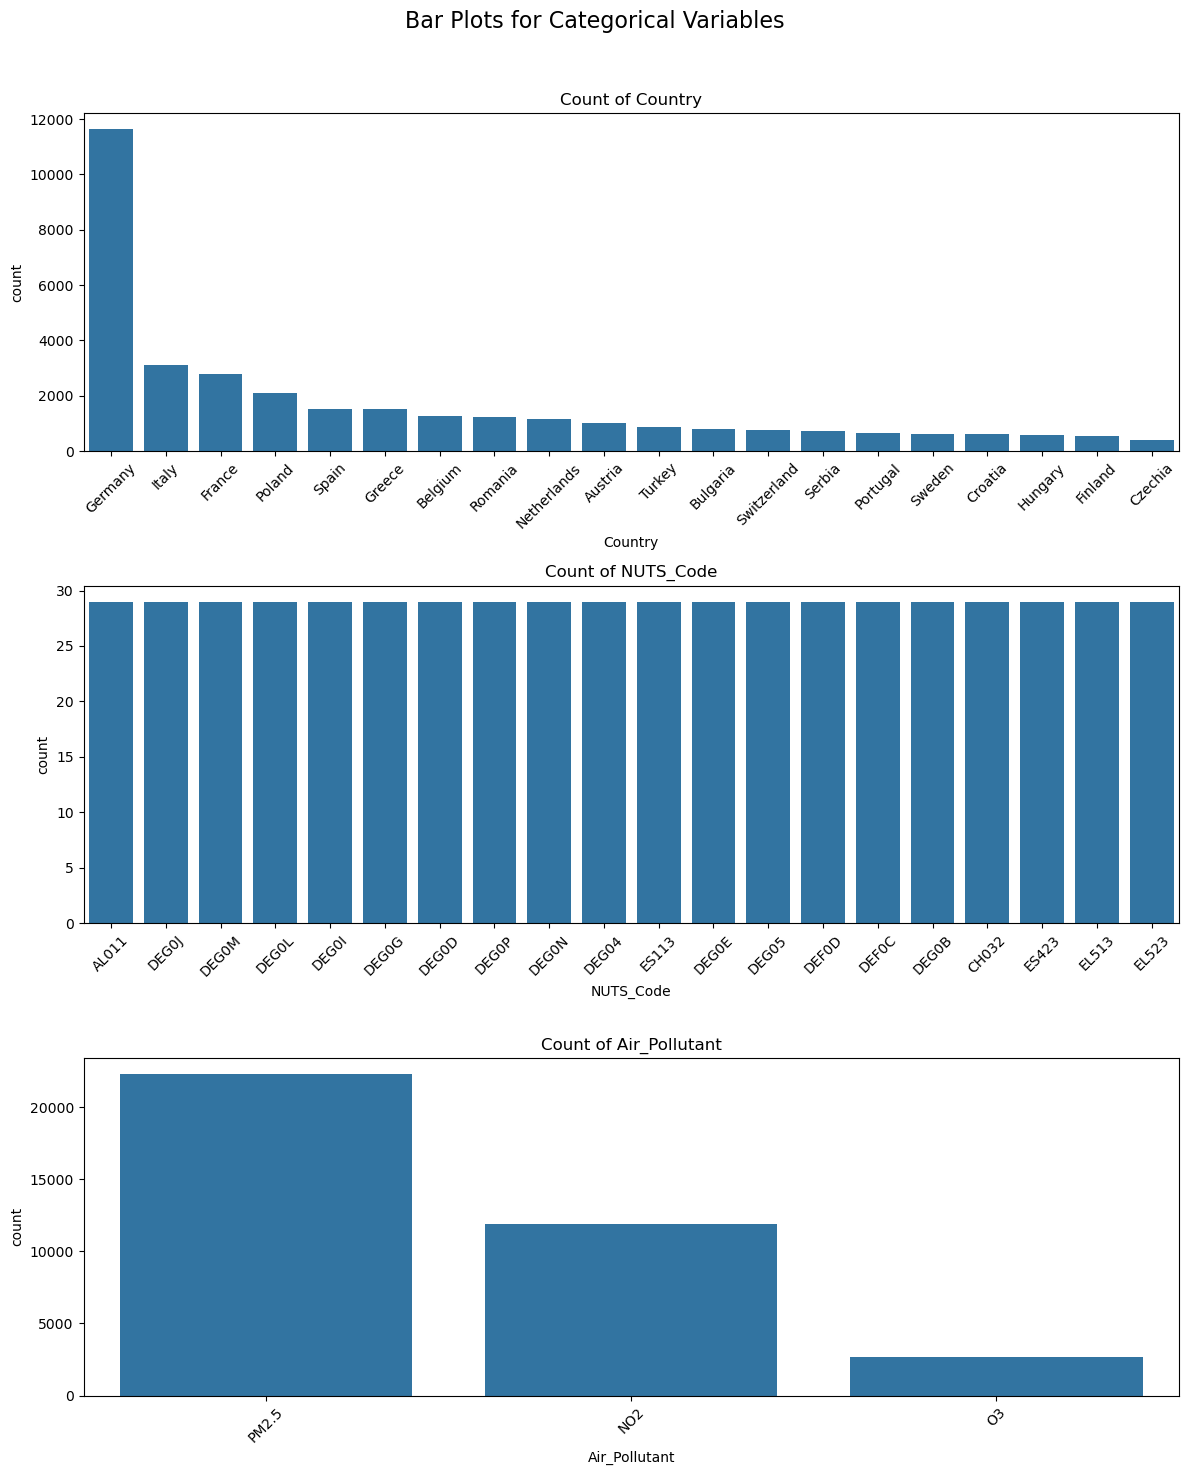

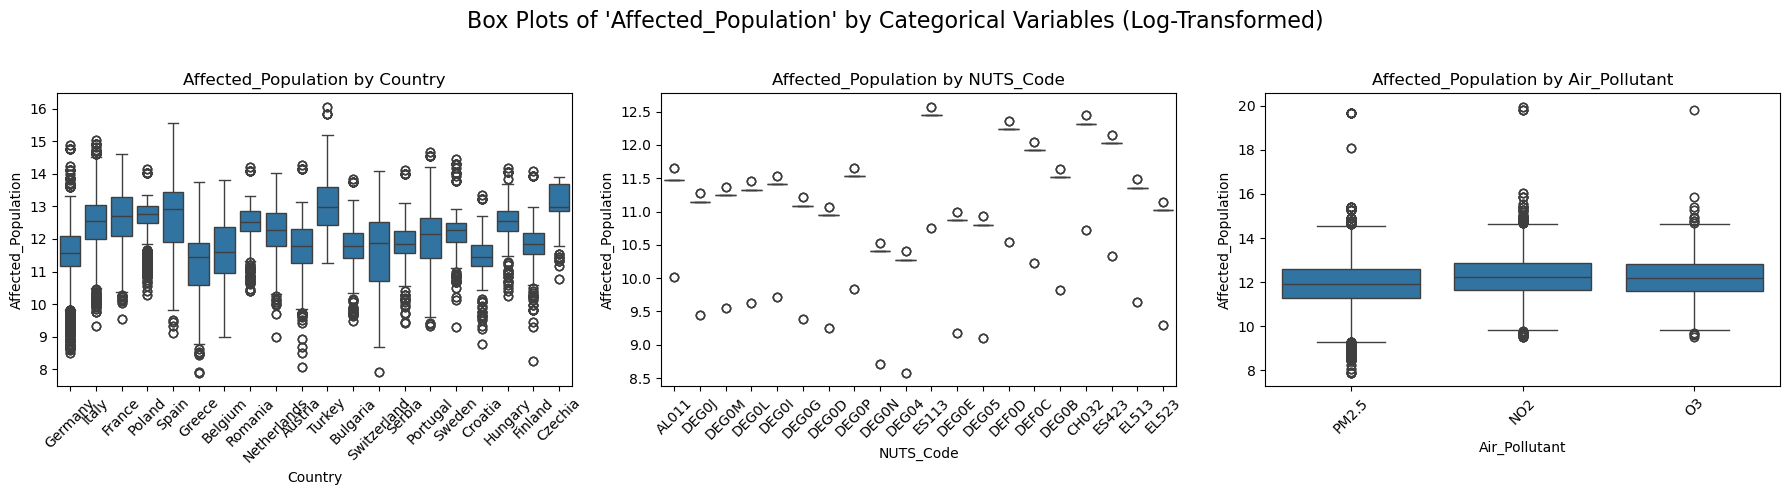

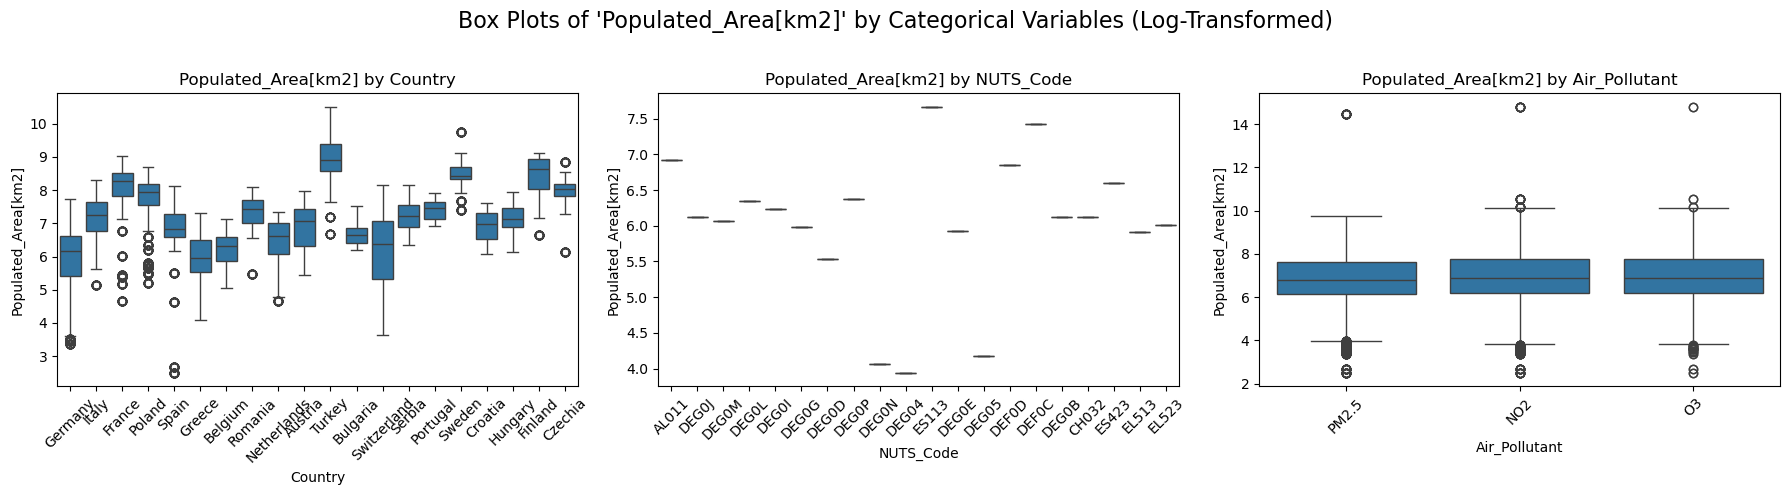

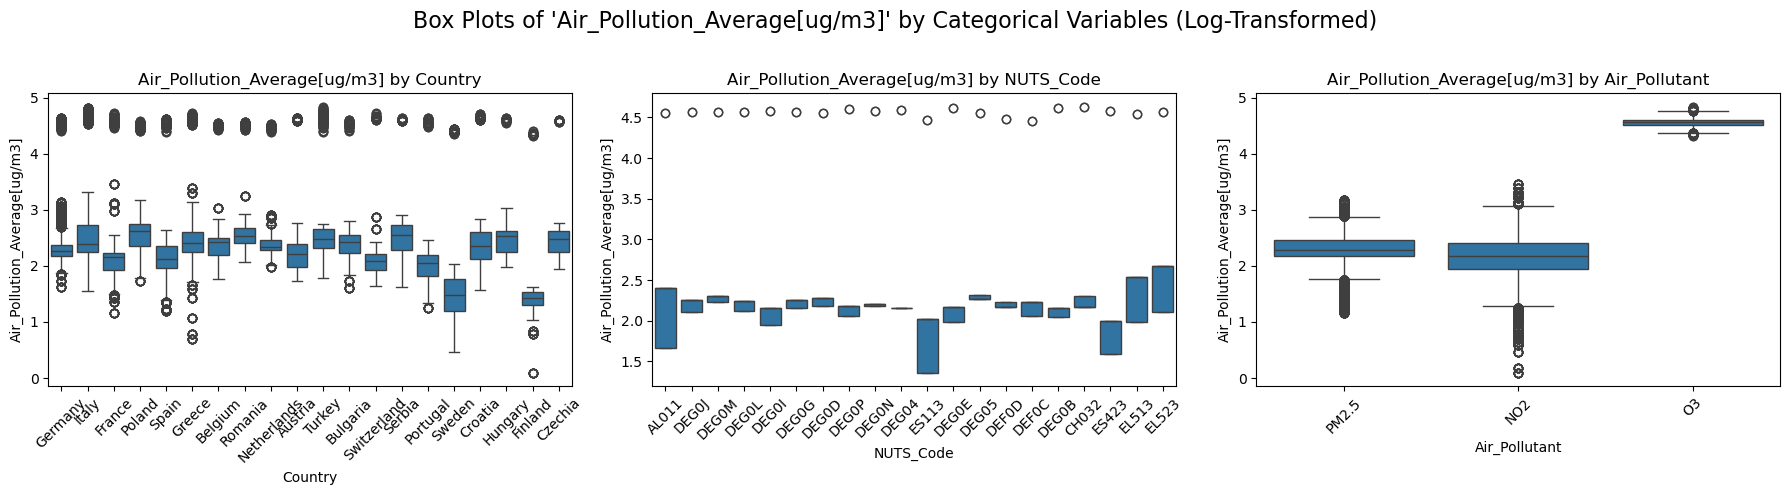

In [5]:
discrete_columns = ['Country', 'NUTS_Code', 'Air_Pollutant']

fig, axes = plt.subplots(len(discrete_columns), 1, figsize=(12, 5 * len(discrete_columns)))
fig.suptitle("Bar Plots for Categorical Variables", fontsize=16)

for i, col in enumerate(discrete_columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])  # top 20
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plots of a numeric value grouped by categories
for value in numeric_pred:

    fig, axes = plt.subplots(nrows=1, ncols=len(discrete_columns), figsize=(6 * len(discrete_columns), 5))
    fig.suptitle(f"Box Plots of '{value}' by Categorical Variables (Log-Transformed)", fontsize=16)

    for i, col in enumerate(discrete_columns):
        sns.boxplot(data=df_log, x=col, y=value, ax=axes[i], order=df_log[col].value_counts().index[:20])
        axes[i].set_title(f"{value} by {col}")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()




#### Análise
- Da análise relativa à contagem dos dados por país, verifica-se que os países com mais dados disponíveis são Alemanha, Itália e França por esta ordem.
- Existe um número consideravelmente superior de registos para o poluente PM2.5, seeguindo-se o poluente NO2 e O3.

#### Cruzamento de dados por país, NUTS_Code e poluente:
- Para as variáveis população afetada, área populacional e poluição média do ar, verificam-se diferenças nas distribuições destes valores por país, o que poderá justificar a grande presença de outliers quando analisámos estas variáveis individualmente.
- Todas as variáveis apresentam um elevado número de outliers por país, com destaque para a variável poluição média do ar, onde a quantidade de outliers se destaca em relação Às outras variáveis numéricas.
- Desta visualização, há que salientar os elevados valores de poluição média[ug/m3] para o poluente O3 em relação aos outros dois poluentes.  


## Targets

#### Analysis of targets

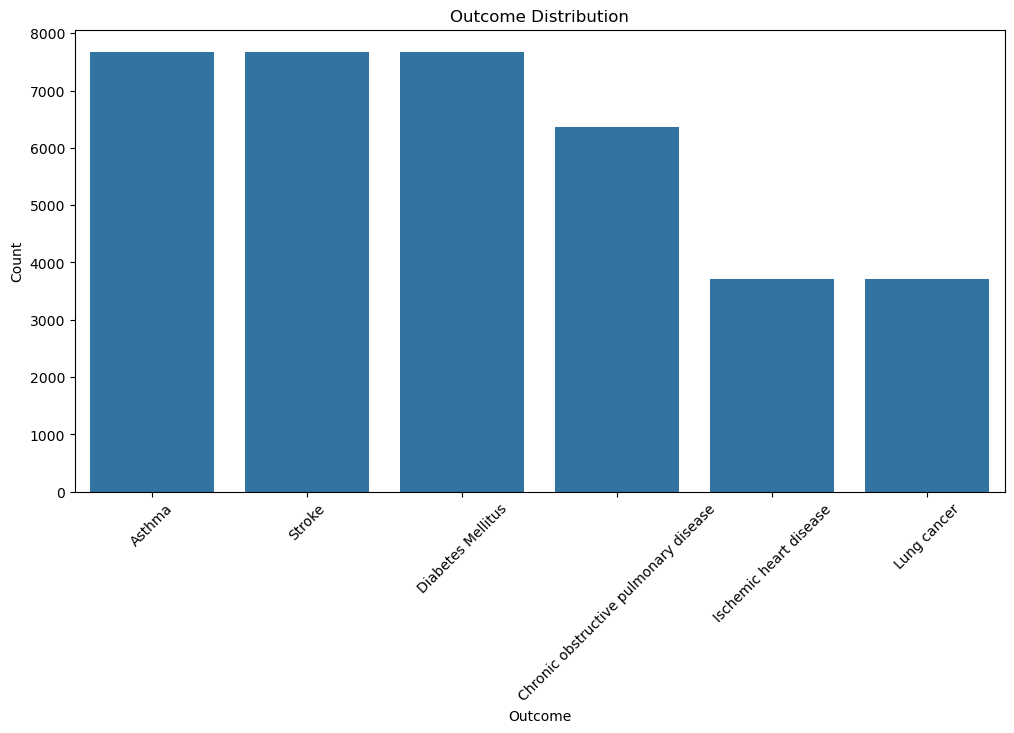

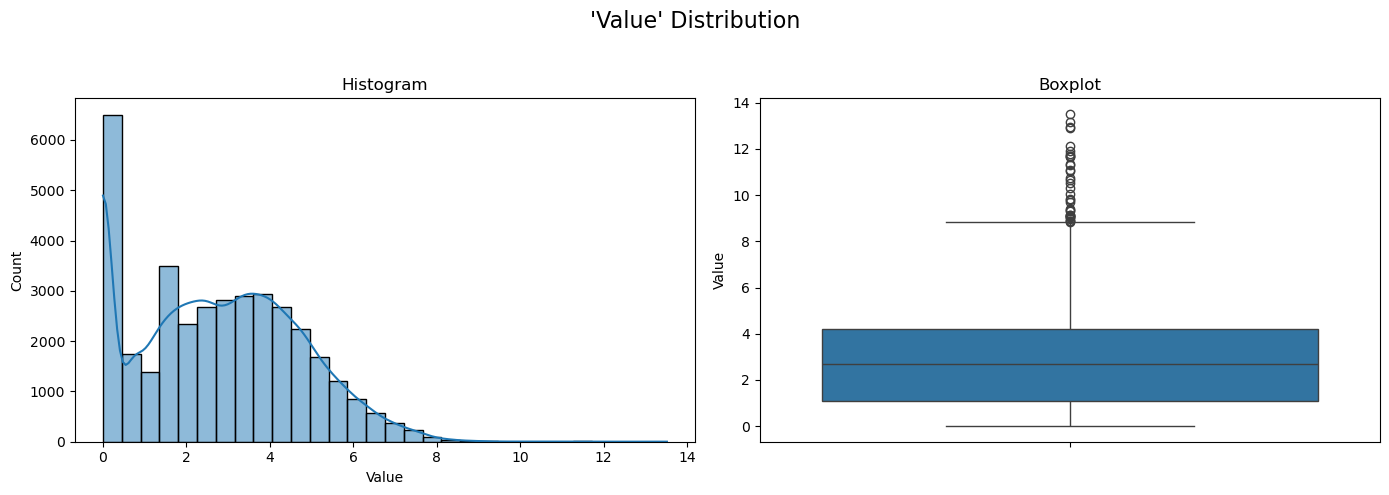

In [6]:
#Outcome
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Outcome', order=df['Outcome'].value_counts().index)
plt.title("Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

df_log['log_Value'] = np.log1p(df_log['Value'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.suptitle("'Value' Distribution", fontsize=16)

# Histogram
sns.histplot(df_log['log_Value'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Count")

# Boxplot (log)
sns.boxplot(y=df_log['log_Value'], ax=axes[1])
axes[1].set_title("Boxplot")
axes[1].set_ylabel("Value")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Análise:
- Relativamente às doenças registadas, ocorreram mais registos de Asma, AVC e Diabetes.
- A variável 'Value' correspondente às mortes prematuras apresenta uma distribuição assimétrica à direita, o que resulta numa elevada concentrção de valores baixos.
- Existe uma elevada quantidade de outliers superiores.

#### Bivariate Analysis

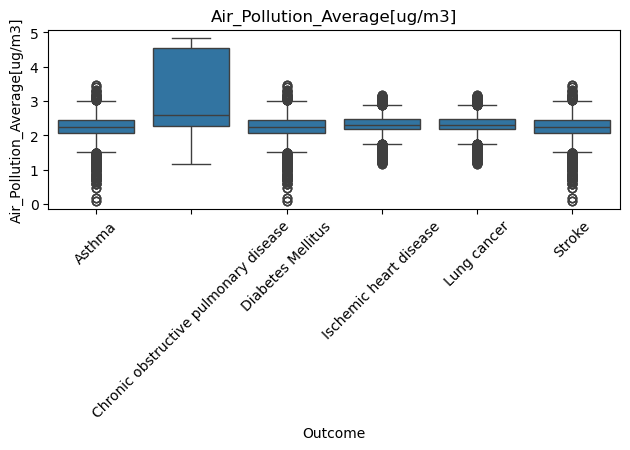

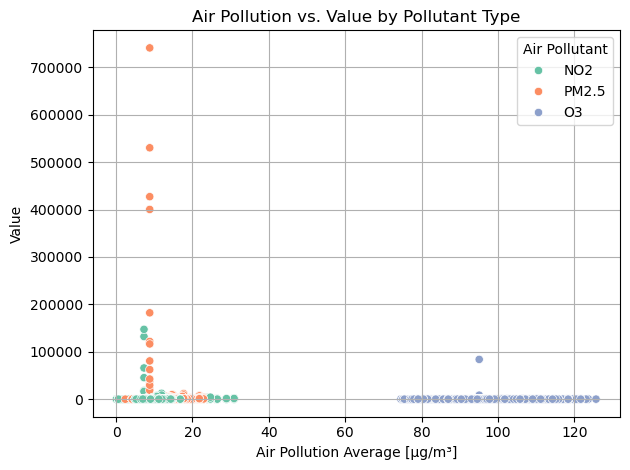

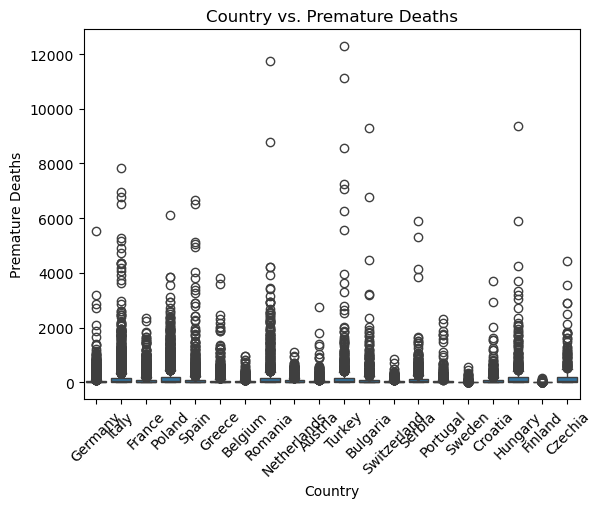

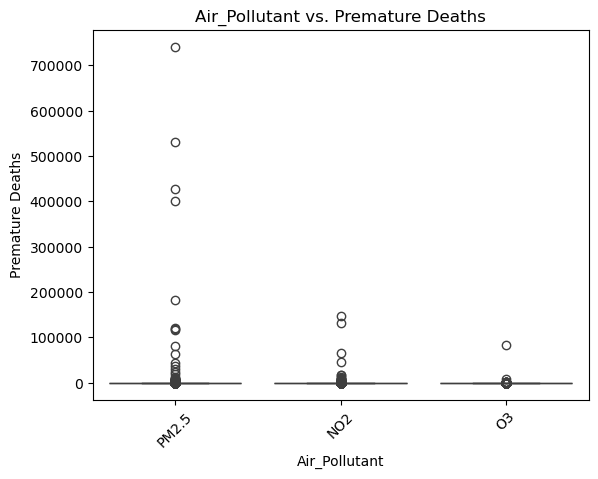

In [7]:
sns.boxplot(data=df_log, x='Outcome', y='Air_Pollution_Average[ug/m3]')
plt.title("Air_Pollution_Average[ug/m3]")
plt.xlabel("Outcome")
plt.xticks(rotation=45)
plt.ylabel("Air_Pollution_Average[ug/m3]")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

sns.scatterplot(
    data=df,
    x='Air_Pollution_Average[ug/m3]',
    y='Value',
    hue='Air_Pollutant',   
    palette='Set2'          
)


plt.title('Air Pollution vs. Value by Pollutant Type')
plt.xlabel('Air Pollution Average [µg/m³]')
plt.ylabel('Value')
plt.legend(title='Air Pollutant')
plt.grid(True)
plt.tight_layout()
plt.show()

df_log['Value'] = np.log1p(df_log['Value'])
sns.boxplot(data=df, x='Country', y='Value',order=df['Country'].value_counts().index[:20])
plt.title("Country vs. Premature Deaths")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Premature Deaths")
plt.show()

sns.boxplot(data=df, x='Air_Pollutant', y='Value',order=df['Air_Pollutant'].value_counts().index[:20])
plt.title("Air_Pollutant vs. Premature Deaths")
plt.xlabel("Air_Pollutant")
plt.xticks(rotation=45)
plt.ylabel("Premature Deaths")
plt.show()


#### Análise
- Relativamente à relação entre as doenças e o nível médio de poluente no ar[ug/m3], verifica-se que este apresenta valores semelhantes em todas as doenças com exceção da doença pulmonar crónica onde os dados mostram que para esta doença, os níveis de poluente são mais elevados.
- Verificou-se também que o valores mais elevados do nível médio de poluente, não produzem necessariamente mais mortes prematuras. É possível verificar pelo gráfico que cruza as informações relativamente ao nível de poluente e ao número de mortes prematuras, que o poluente O3 apresenta os valores mais elevados em termos de concentração média do poluente mas é o que produz menos mortes. Já no caso do PM2.5, verificamos exatamente o contrário: valores menores e mais mortes prematuras.
- Relativamente às mortes prematuras por país, nos 20 países com maior número de mortes, os valores mantêm padrões semelhantes mas um elevado número de outliers.
- Conforme verificado anteriormente, o gráfico da distribuição do número de mortes prematuras por poluente volta a salientar que o poluente PM2.5 é o que regista o maior valor de mortes.

#### Data pre processing

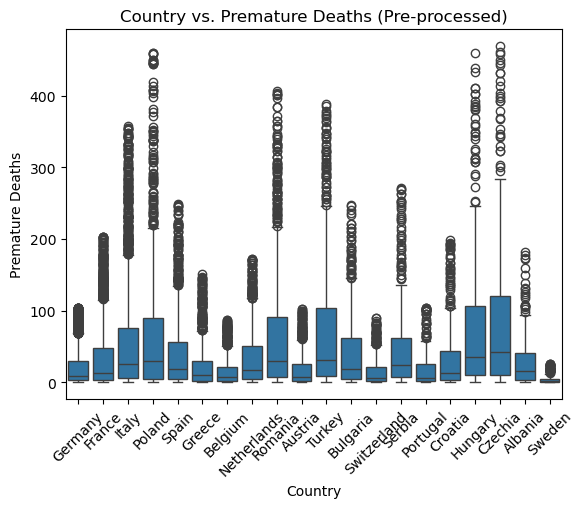

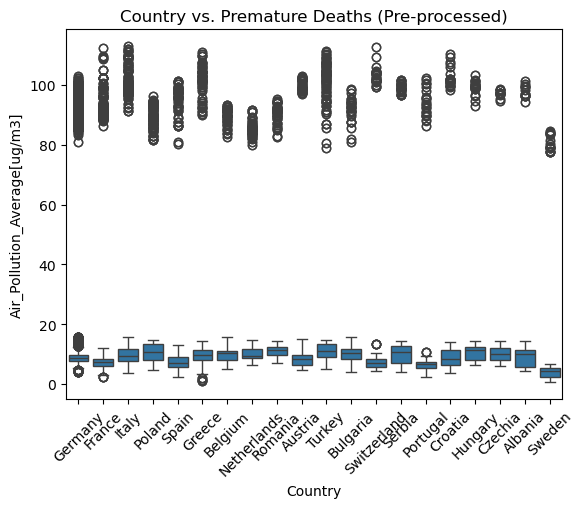

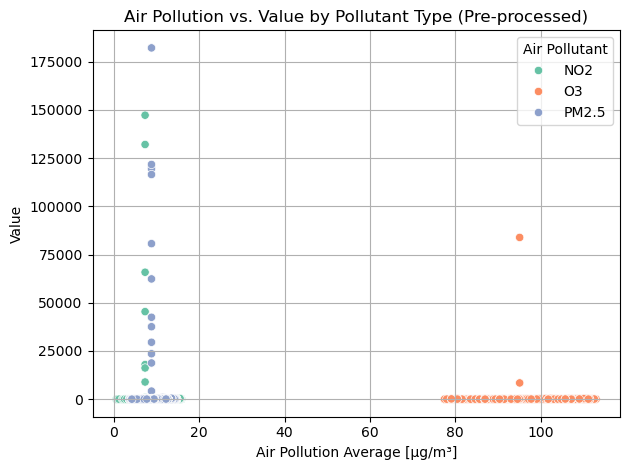

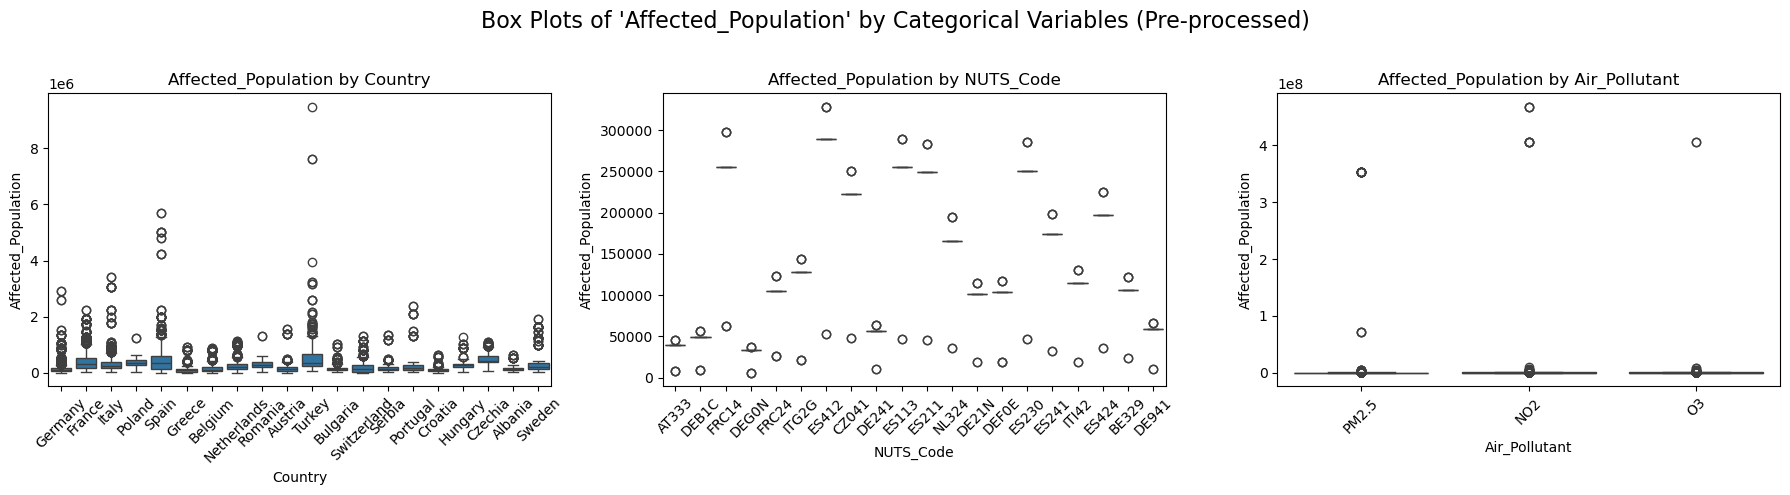

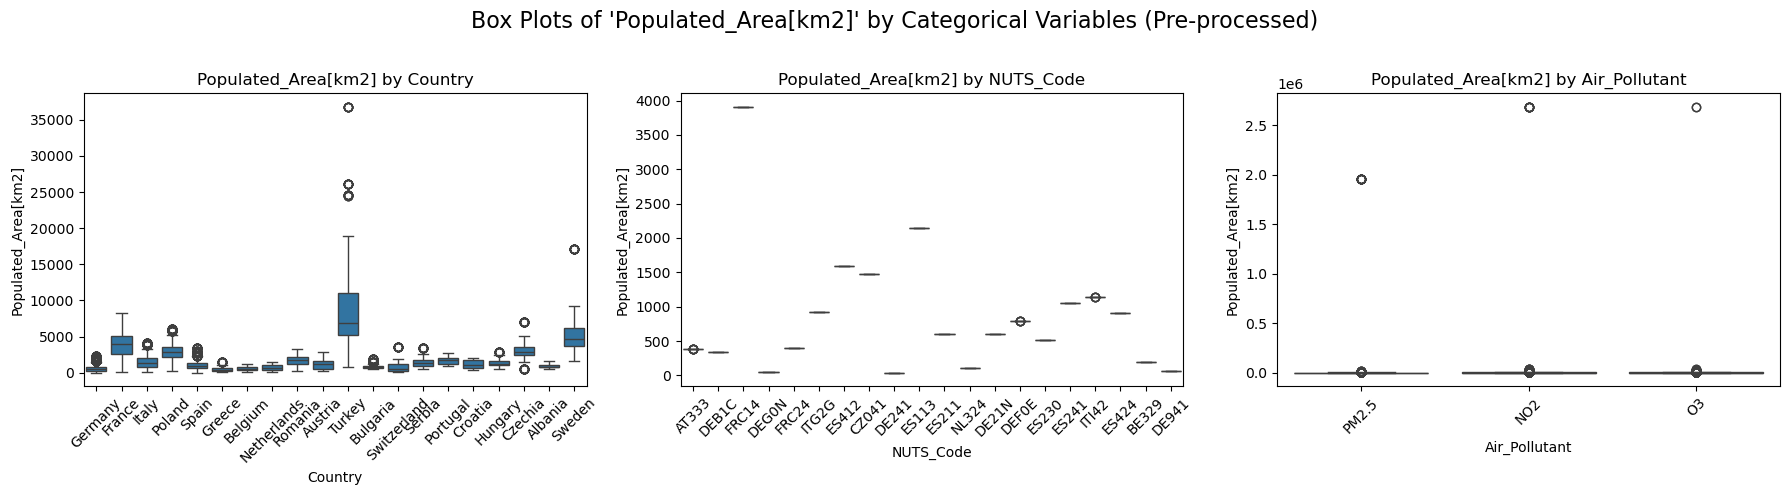

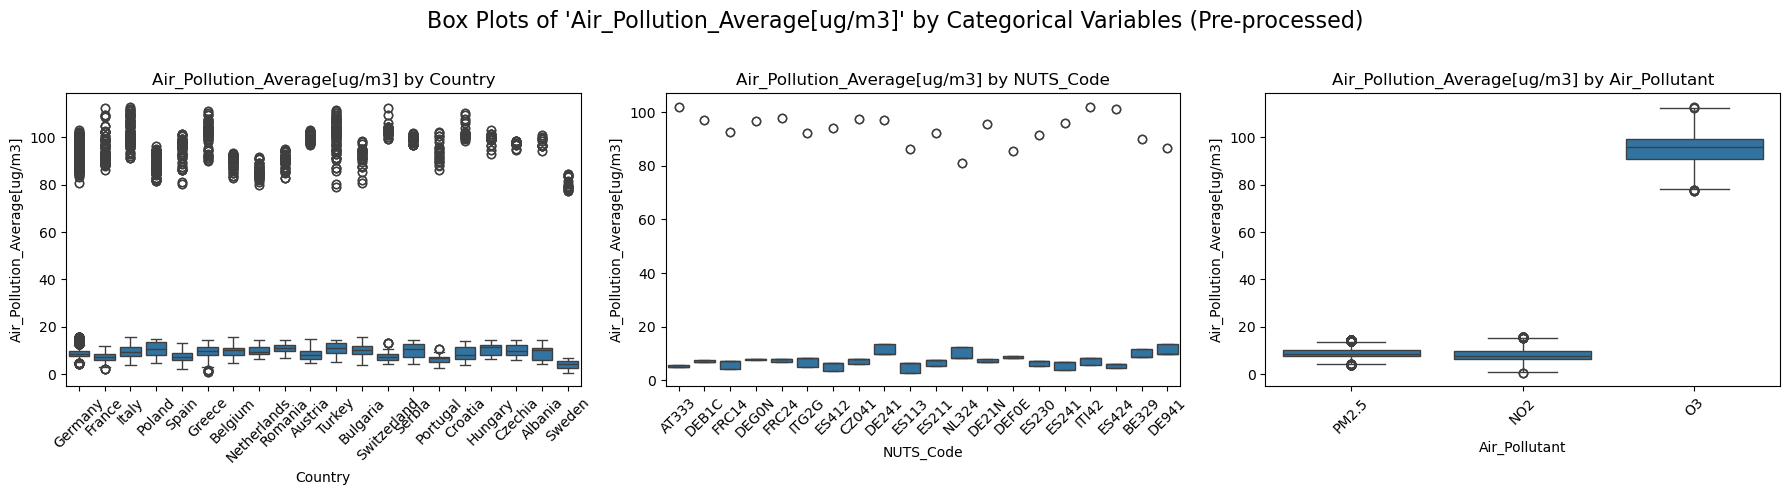

,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
count,2.844400e+04,2.844400e+04,28444.000000,28444.000000
mean,5.302557e+05,3.545872e+03,16.088940,81.701870
std,1.057594e+07,6.645302e+04,24.468695,2253.572189
min,2.674000e+03,1.120000e+01,0.600000,0.000000
25%,9.031700e+04,4.684000e+02,7.400000,3.000000
50%,1.612260e+05,8.734000e+02,8.700000,12.000000
75%,2.978000e+05,1.996100e+03,10.800000,42.000000
max,4.680626e+08,2.687568e+06,113.000000,182147.000000


In [8]:
# Remove nulls
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

#Remove outliers
def remove_outliers_by_criteria(df, value_col, criteria_col):
    df_clean = pd.DataFrame()

    # Group by country
    for country, group in df.groupby(criteria_col):
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        filtered = group[(group[value_col] >= lower_bound) & (group[value_col] <= upper_bound)]
        df_clean = pd.concat([df_clean, filtered], ignore_index=True)

    return df_clean

df_preprocessed = remove_outliers_by_criteria(df=df, value_col='Value', criteria_col='Country')
df_preprocessed = remove_outliers_by_criteria(df=df_preprocessed, value_col='Air_Pollution_Average[ug/m3]', criteria_col='Air_Pollutant')

# View pre processed data
sns.boxplot(data=df_preprocessed, x='Country', y='Value',order=df_preprocessed['Country'].value_counts().index[:20])
plt.title("Country vs. Premature Deaths (Pre-processed)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Premature Deaths")
plt.show()

sns.boxplot(data=df_preprocessed, x='Country', y='Air_Pollution_Average[ug/m3]',order=df_preprocessed['Country'].value_counts().index[:20])
plt.title("Country vs. Premature Deaths (Pre-processed)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Air_Pollution_Average[ug/m3]")
plt.show()

sns.scatterplot(
    data=df_preprocessed,
    x='Air_Pollution_Average[ug/m3]',
    y='Value',
    hue='Air_Pollutant', 
    palette='Set2'       
)


plt.title('Air Pollution vs. Value by Pollutant Type (Pre-processed)')
plt.xlabel('Air Pollution Average [µg/m³]')
plt.ylabel('Value')
plt.legend(title='Air Pollutant')
plt.grid(True)
plt.tight_layout()
plt.show()

for value in numeric_pred:

    fig, axes = plt.subplots(nrows=1, ncols=len(discrete_columns), figsize=(6 * len(discrete_columns), 5))
    fig.suptitle(f"Box Plots of '{value}' by Categorical Variables (Pre-processed)", fontsize=16)

    for i, col in enumerate(discrete_columns):
        sns.boxplot(data=df_preprocessed, x=col, y=value, ax=axes[i], order=df_preprocessed[col].value_counts().index[:20])
        axes[i].set_title(f"{value} by {col}")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

df_preprocessed.describe()

Da análise realizada anteriormente, verificamos uma grande presença de outliers nas variáveis 'Value' e 'Air Pollution Average[ug/m3]'.
Desta forma, decidimos eliminar os outliers destas duas variáveis para obtermos dados mais fiáveis e ao mesmo tempo não restringir o dataset de forma significativa. 

NOTA: Para a variável 'Air Pollution Average[ug/m3]', inicialmente procedeu-se à eliminação dos outliers por país. No entanto, devido aos elevados valores desta variável para o poluente O3, os dados para este mesmo poluente eram completamente eliminados. A solução passou por eliminar os outliers por poluente e não por país. Isto resultou na permanência de um elevado número de outliers por país que serão referentes às concentrações para o poluente O3.

In [9]:
country_region_map = {
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Switzerland': 'Western Europe',

    'Poland': 'Eastern Europe',
    'Czechia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',

    'Greece': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Portugal': 'Southern Europe',

    'Sweden': 'Northern Europe',
    'Denmark': 'Northern Europe',
    'Finland': 'Northern Europe',
    'Norway': 'Northern Europe'
}

df['Region'] = df_preprocessed['Country'].map(country_region_map)

Para a divisão dos países por região foi utilizado um mapa. 
De seguida, é criada uma nova coluna, 'Region' que guarda a respetiva região para o país considerado.